In [1]:

from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.0em;
line-height:1.6em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: 1em;
text-align:center;
}

div.text_cell_render h3 { /*  Parts names nearer from text */
margin-bottom: 0.8em;
text-align:center;
}

div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.2em;
line-height:1.2em;
padding-left:1em;
padding-right:3em;
}
</style>
""")

# Sentiment Analysis ML approach

```

Step 1: Import dependencies

Step 2: Build training dataset and testing dataset

Step 3: Generate feature vector by using TfidfVectorizer

Step 4: Perform training using different ML algos

Step 5: Refresh testing matrices

Step 6: Test the results


```

### Import dependancies

In [2]:
import os
import time
from __future__ import print_function
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#%config IPCompleter.greedy=True

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Build training dataset and testing dataset

In [8]:
data_dir = "./data"
classes = ['positiveReviews', 'negativeReviews']

# Read the data
train_data = []
train_labels = []
test_data = []
test_labels = []
for curr_class in classes:
    dirname = os.path.join(data_dir, curr_class)
    for fname in os.listdir(dirname):
        with open(os.path.join(dirname, fname), 'r', encoding="ISO-8859-1") as f:
            content = f.read()
            if fname.startswith('12'):
                test_data.append(content)
                test_labels.append(curr_class)
            else:
                train_data.append(content)
                train_labels.append(curr_class)
                


### Generate feature vector by using TfidfVectorizer

In [9]:
# Create feature vectors
vectorizer = TfidfVectorizer(min_df=5,
                                 max_df = 0.8,
                                 sublinear_tf=True,
                                 use_idf=True)
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)


### Perform training using different ML algos

In [10]:
# Perform classification with MultinomialNB
clf = MultinomialNB()
clf.fit(train_vectors, train_labels)
prediction = clf.predict(test_vectors)

# Perform classification with SVM, kernel=rbf
classifier_rbf = svm.SVC()
classifier_rbf.fit(train_vectors, train_labels)
prediction_rbf = classifier_rbf.predict(test_vectors)
    
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, train_labels)
prediction_linear = classifier_linear.predict(test_vectors)
  
# Perform classification with SVM, kernel=linear
classifier_liblinear = svm.LinearSVC()
classifier_liblinear.fit(train_vectors, train_labels)
prediction_liblinear = classifier_liblinear.predict(test_vectors)

### Refresh testing matrices

#### Confusion Matrix

|| Predicted (Class Ham)| Predicted (Class Spam)|
|:---:|:---: |:---:|
|  Actual (Class Ham) |True Positive (TP) | False Negative (FN)|
|  Actual (Class Spam)|False Positive(FP) | True Negative (TN) |

```
    Patient: positive for disease

    Healthy: negative for disease

    True positive (TP) = the number of cases correctly identified as patient

    False positive (FP) = the number of cases incorrectly identified as patient

    True negative (TN) = the number of cases correctly identified as healthy

    False negative (FN) = the number of cases incorrectly identified as healthy

```


```
    TP = Correct hit

    TN = Correct rejection
    
    FP = False alarm 
    
    FN = Miss the situation
```

#### Precision, Recall, TPR, FPR F1-Score and Accuracy

\begin{equation}\Large
   Precision \;||\; Positive \; Pridicted \; Value \;(PPV) =  \frac{TP}{ TP + FP}
\end{equation} 


```


```

\begin{equation}\Large
   Recall \;||\; Hit-rate \;||\; Sensitivity \;||\; True\; Positive\; Rate \;(TPR) =  \frac{TP}{ TP + FN}
\end{equation} 



```


```

\begin{equation}\Large
    Fall-out \;||\; Specificity \;||\; False\; Positive\; Rate \;(FPR) =  \frac{TN}{ TN + FP}
\end{equation} 


```


```

\begin{equation}\Large
   F1-Score = 2* \frac{\text precision * recall}{\text precision + recall}
\end{equation} 


```



```

\begin{equation}\Large
   Accuracy =  \frac{TP + TN}{ TP+TN+FP+FN}
\end{equation} 


```



```


#### ROC-AUC cure

__TPR__: This is our __Y-axis__

* This metric corresponds to the proportion of positive data points that are correctly considered as positive, with 
  respect to all positive data points.
  
* In other words, higher TPR, the fewer positive data points we will miss.

__FPR__: This is our __X-axis__

* This metric corresponds to the proportion of negative data points that are mistakenly considered as positive, 
  with respect to all negative data points. 

* In other words, the higher FPR, the more negative data points will be missclassified

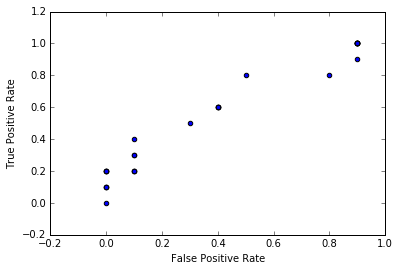

In [11]:
import matplotlib.pyplot as plt
import numpy as np

score = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.30, 0.1])
y = np.array([1,1,0, 1, 1, 1, 0, 0, 1, 0, 1,0, 1, 0, 0, 0, 1 , 0, 1, 0])

roc_x = []
roc_y = []
min_score = min(score)
max_score = max(score)
thr = np.linspace(min_score, max_score, 30)
#print (thr)
FP=0
TP=0
N = sum(y)
#print (N)

P = len(y) - N
#print (len(y))
#print (P)

for (i, T) in enumerate(thr):
    #print(T)
    #print(thr)
    for i in range(0, len(score)):
        if (score[i] > T):
            if (y[i]==1):
                TP = TP + 1
            if (y[i]==0):
                FP = FP + 1
    roc_x.append(FP/float(N))
    roc_y.append(TP/float(P))
    FP=0
    TP=0

plt.scatter(roc_x, roc_y)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Test the result of MultinomialNB

In [12]:
# Print results in a nice table for MultinomialNB
print("\nResults for NaiveBayes (MultinomialNB) ")
print(classification_report(test_labels, prediction))
print ("Accuracy of Naive Bayes Algorithm:" + str(accuracy_score(test_labels, prediction)))

print("\n\n\n")
print ("Reviews Prediction")
print ("\nPredicted label is------> "+prediction[10] )
print ("\nMovie Review is ------> \n"+test_data[10])


Results for NaiveBayes (MultinomialNB) 
                 precision    recall  f1-score   support

negativeReviews       0.81      0.85      0.83       611
positiveReviews       0.84      0.80      0.82       611

    avg / total       0.83      0.83      0.83      1222

Accuracy of Naive Bayes Algorithm:0.82569558101473




Reviews Prediction

Predicted label is------> positiveReviews

Movie Review is ------> 
The premise may seem goofy, but since Murphy's character doesn't take it seriously, it helps ease the audience into this mix of mysticism and modern-day hard-boiled child abduction. Excellent cast, particularly Charles Dance and Charlotte Lewis, and Murphy is at the height of his 80's peak in comedy/action. There's also some great F/X, a very surreal dream sequence, and a fairly original plot. Often overlooked in the pantheon of Murphy flicks, but this one is worth a look.


### Test the result of SVM with rbf kernal

In [13]:
# Print results in a nice table for SVM algorithm with rbf kernal
print("\nResults for SVM algorithm with rbf kernel")
print(classification_report(test_labels, prediction_rbf))
print ("Accuracy of SVM algorithm with rbf kernel:" + str(accuracy_score(test_labels, prediction_rbf)))

print("\n\n\n")
print ("Reviews Prediction")
print ("\nPredicted label is------> "+prediction[10] )
print ("\nMovie Review is ------> \n"+test_data[10])


Results for SVM algorithm with rbf kernel
                 precision    recall  f1-score   support

negativeReviews       1.00      0.13      0.24       611
positiveReviews       0.54      1.00      0.70       611

    avg / total       0.77      0.57      0.47      1222

Accuracy of SVM algorithm with rbf kernel:0.5671031096563012




Reviews Prediction

Predicted label is------> positiveReviews

Movie Review is ------> 
The premise may seem goofy, but since Murphy's character doesn't take it seriously, it helps ease the audience into this mix of mysticism and modern-day hard-boiled child abduction. Excellent cast, particularly Charles Dance and Charlotte Lewis, and Murphy is at the height of his 80's peak in comedy/action. There's also some great F/X, a very surreal dream sequence, and a fairly original plot. Often overlooked in the pantheon of Murphy flicks, but this one is worth a look.


### Test the result of SVM with linear kernal

In [14]:
# Print results in a nice table for SVM algorithm with linear kernal
print("\nResults for SVM algorithm with linear kernel")
print(classification_report(test_labels, prediction_linear))
print ("Accuracy of SVM algorithm with rbf kernel:" + str(accuracy_score(test_labels, prediction_linear)))

print("\n\n\n")
print ("Reviews Prediction")
print ("\nPredicted label is------> "+prediction[10] )
print ("\nMovie Review is ------> \n"+test_data[10])


Results for SVM algorithm with linear kernel
                 precision    recall  f1-score   support

negativeReviews       0.83      0.86      0.85       611
positiveReviews       0.86      0.82      0.84       611

    avg / total       0.84      0.84      0.84      1222

Accuracy of SVM algorithm with rbf kernel:0.8428805237315876




Reviews Prediction

Predicted label is------> positiveReviews

Movie Review is ------> 
The premise may seem goofy, but since Murphy's character doesn't take it seriously, it helps ease the audience into this mix of mysticism and modern-day hard-boiled child abduction. Excellent cast, particularly Charles Dance and Charlotte Lewis, and Murphy is at the height of his 80's peak in comedy/action. There's also some great F/X, a very surreal dream sequence, and a fairly original plot. Often overlooked in the pantheon of Murphy flicks, but this one is worth a look.


### Test the result of SVM with linearSVC

In [15]:
# Print results in a nice table for SVM algorithm with liblinear kernal
print("\nResults for SVM algorithm with liblinear kernel")
print(classification_report(test_labels, prediction_liblinear))
print ("Accuracy of SVM algorithm with rbf kernel:" + str(accuracy_score(test_labels, prediction_liblinear)))

print("\n\n\n")
print ("Reviews Prediction")
print ("\nPredicted label is------> "+prediction[10] )
print ("\nMovie Review is ------> \n"+test_data[10])


Results for SVM algorithm with liblinear kernel
                 precision    recall  f1-score   support

negativeReviews       0.82      0.86      0.84       611
positiveReviews       0.86      0.82      0.84       611

    avg / total       0.84      0.84      0.84      1222

Accuracy of SVM algorithm with rbf kernel:0.839607201309329




Reviews Prediction

Predicted label is------> positiveReviews

Movie Review is ------> 
The premise may seem goofy, but since Murphy's character doesn't take it seriously, it helps ease the audience into this mix of mysticism and modern-day hard-boiled child abduction. Excellent cast, particularly Charles Dance and Charlotte Lewis, and Murphy is at the height of his 80's peak in comedy/action. There's also some great F/X, a very surreal dream sequence, and a fairly original plot. Often overlooked in the pantheon of Murphy flicks, but this one is worth a look.
